<a href="https://colab.research.google.com/github/yunju-1118/EWHA/blob/2025-1-Statistical-Methods-for-Big-Data-Analysis/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 3**
## **3. Regression and Classification**
#### 1) Deep learning model

**Regression**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

**Sequential** 모델은 층을 선형으로 연결하여 구성

In [2]:
model = keras.Sequential()

다음으로 **add( )** 메서드를 이용해 층을 추가할 수 있다.

In [3]:
model.add(Dense(32, activation='relu', input_dim=784))
model.add(Dense(32, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**compile** 메서드를 통해 학습 방식에 대한 환경 설정이 필요하다.
- optimizer
- loss function
- metric

In [4]:
# multi-class classification
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# binary classification
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# mean squared error regression problem
model.compile(optimizer = 'rmsprop',
              loss ='mse')

##### (1) Regression

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# library for regression
from sklearn import datasets

In [6]:
# import dataset
mydata = datasets.load_diabetes()

In [7]:
df = pd.DataFrame(mydata['data'], columns = mydata['feature_names'])

df['diabetes_score'] = mydata['target']

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_score
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
# data preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1],
                                                    test_size=0.2,
                                                    shuffle = True, random_state=42)

**building model**

DNN 모델의 하이퍼파라미터
- Dense layer 안의 배치 사이즈와 활성화 함수, 파라미터 초기화
- hidden layer의 개수
- BN(batchNormalization layer) 추가
- learning rate(0.01, 0.05, 0.001)
- drop out layer 추가

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model = tf.keras.Sequential([
    # input layer
    tf.keras.layers.Dense(64, activation = "relu", input_dim = (len(df.columns)-1)),

    # hidden layer
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(16, activation = "relu"),

    # output layer
    tf.keras.layers.Dense(1, activation = "linear")   # linear -> reg
])

# model compile
model.compile(optimizer = "adam", loss = "mse", metrics=['mse'])

# model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

**training model**

In [13]:
history = model.fit(X_train, y_train, batch_size = 32,
                    epochs = 100, validation_split = 0.2, verbose = 1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 30601.7812 - mse: 30601.7812 - val_loss: 22471.9492 - val_mse: 22471.9492
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 30934.0137 - mse: 30934.0137 - val_loss: 22444.7227 - val_mse: 22444.7227
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 31851.8125 - mse: 31851.8125 - val_loss: 22404.5859 - val_mse: 22404.5859
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 30595.9199 - mse: 30595.9199 - val_loss: 22343.4297 - val_mse: 22343.4297
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 31454.2832 - mse: 31454.2832 - val_loss: 22248.1152 - val_mse: 22248.1152
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 31796.4180 - mse: 31796.4180 - val_loss: 22099.9434 - val_mse: 22099.9434
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 32207.8340 - mse: 32207.8340 - val_loss: 21874.1934 - val_mse: 21874.1934
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 29686.0332 - mse: 

전체 데이터 수 / batch_size = iteration

In [18]:
# loss function
def plot_loss_curve(total_epoch = 10, start = 1):

  # package for visualization
  import matplotlib.pyplot as plt
  import seaborn as sns
  sns.set_theme(color_codes = True)

  plt.figure
  plt.plot(figsize=(15,5))
  plt.plot(range(start, total_epoch + 1), history.history['loss'][start-1:total_epoch],
           label="Train")
  plt.plot(range(start, total_epoch + 1), history.history['val_loss'][start-1:total_epoch],
           label="Validation")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

# mse function
def plot_mse_curve(total_epoch = 10, start = 1):
  # package for visualization
  import matplotlib.pyplot as plt
  import seaborn as sns
  sns.set_theme(color_codes = True)

  plt.figure
  plt.plot(figsize=(15,5))
  plt.plot(range(start, total_epoch + 1),
           history.history['mse'][start-1:total_epoch], label="Train")
  plt.plot(range(start, total_epoch + 1),
           history.history['val_mse'][start-1:total_epoch], label="Validation")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

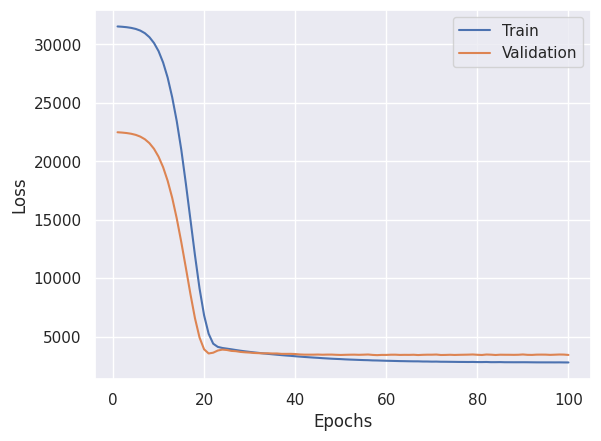

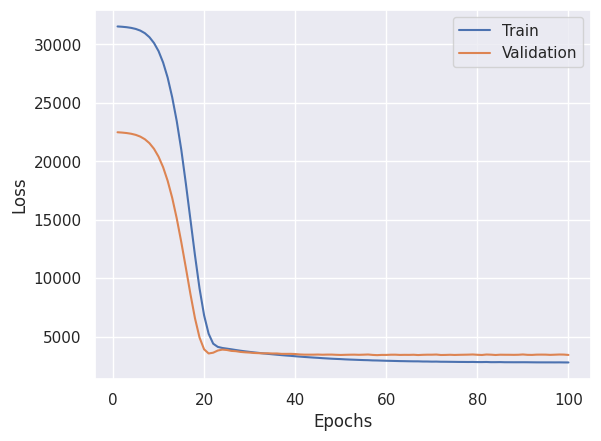

In [19]:
plot_loss_curve(total_epoch=100, start = 1)
plot_mse_curve(total_epoch=100, start = 1)

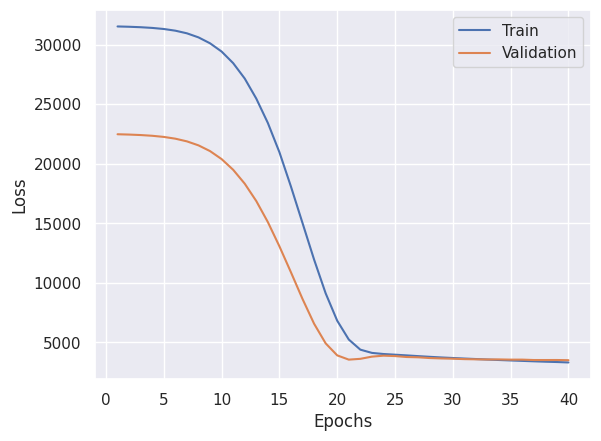

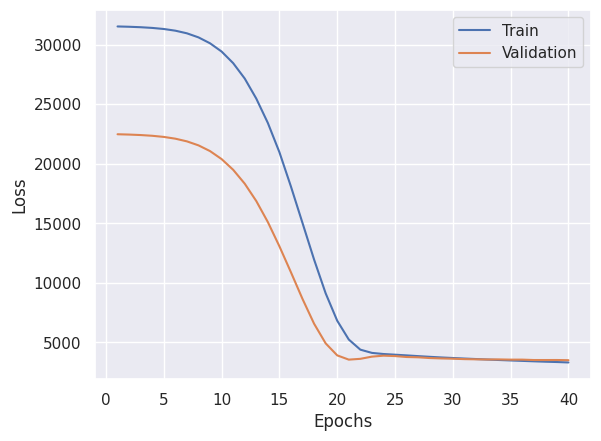

In [20]:
plot_loss_curve(total_epoch=40, start = 1)
plot_mse_curve(total_epoch=40, start = 1)

**Test model**

In [22]:
res = model.evaluate(X_test, y_test, verbose=1)
print(f'Test MSE: {round(res[1],4)}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3098.0146 - mse: 3098.0146
Test MSE: 2923.2671


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


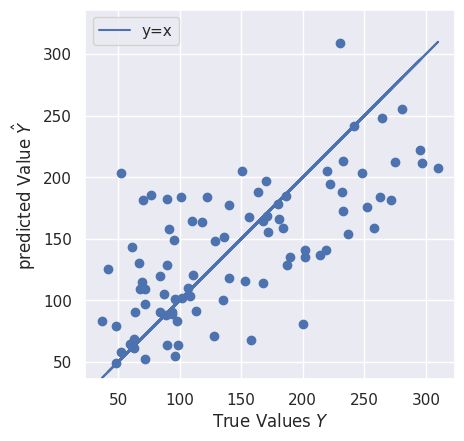

In [23]:
# plot
import matplotlib.pyplot as plt

plt.scatter(y_test, model.predict(X_test))
plt.xlabel("True Values $Y$")
plt.ylabel("predicted Value $\hat{Y}$")
plt.axis("equal")
plt.axis("square")
plt.plot(y_test, y_test, label="y=x")
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, model.predict(X_test))
r2

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


0.4482477293167805

**building model ( + initialization)**

In [26]:
model = tf.keras.Sequential([
    # input layer
    tf.keras.layers.Dense(256, activation="relu", input_dim = (len(df.columns)-1),
                          kernel_initializer = "he_normal"),

    # hidden layer
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),

    # ouput layer
    tf.keras.layers.Dense(1, activation="linear")
])

model.compile(optimizer = "adam", loss="mse", metrics = ['mse'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,593 (182.00 KB)

 Trainable params: 46,593 (182.00 KB)

 Non-trainable params: 0 (0.00 B)

**Classification**


In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
sns.set_theme(color_codes = True)

In [44]:
SEED = 22
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [56]:
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [57]:
red['type'] = 0
white['type'] = 1

In [58]:
# 와인 데이터셋 병합
wine = pd.concat([red, white])
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0


In [52]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


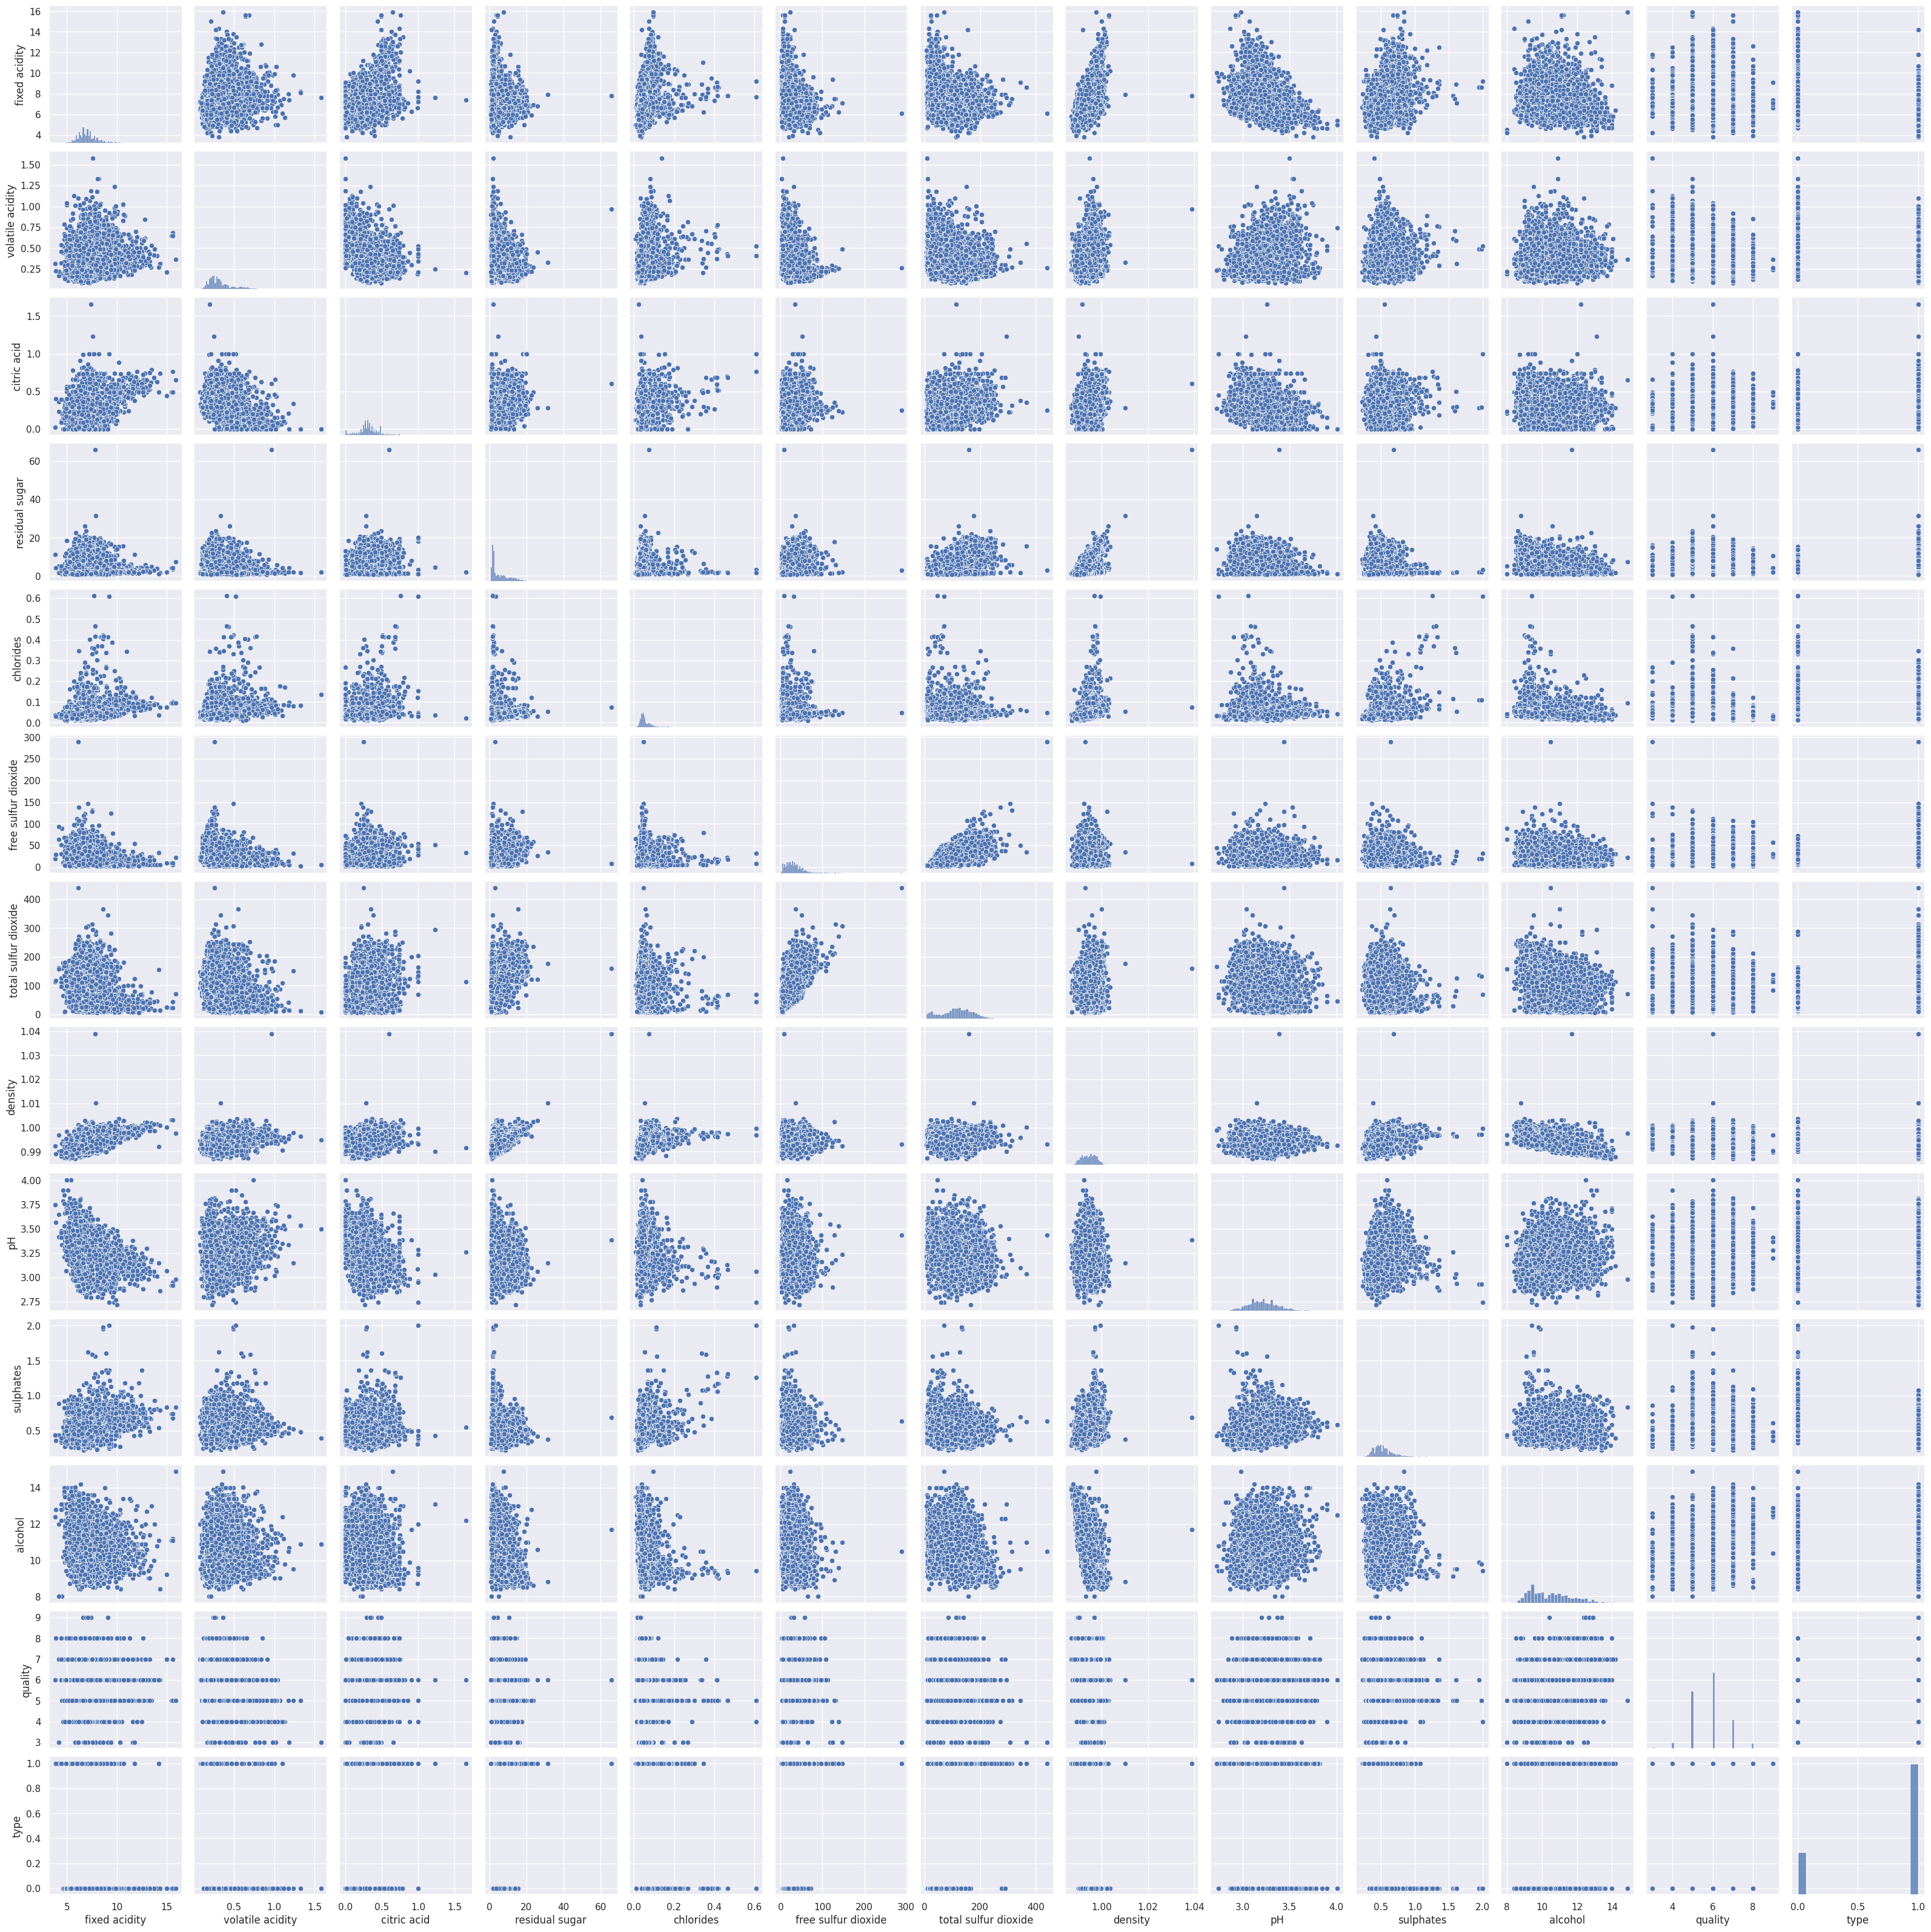

In [53]:
sns.pairplot(wine)
plt.show()

In [59]:
# One-hot encoder
wine = pd.get_dummies(data = wine, columns = ['quality', 'type'], prefix = ['quality', 'type'],
                      dtype = 'int')

In [60]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,type_0,type_1
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0,1,0,0,0,0,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0,1,0,0,0,0,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0,1,0,0,0,0,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0,0,1,0,0,0,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0,1,0,0,0,0,1,0


In [61]:
X = wine.iloc[:, :-2]
y = wine.iloc[:,-2:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
shuffle = True, random_state = SEED)

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**building model**

In [63]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Optimizer

In [65]:
model = tf.keras.Sequential([
    # hidden layer
    tf.keras.layers.Dense(units=48, activation = "relu", input_shape=(18,)),
    tf.keras.layers.Dense(units=24, activation = "relu"),
    tf.keras.layers.Dense(units=12, activation = "relu"),

    # output layer
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 48)             │           912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 24)             │         1,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,414 (9.43 KB)

 Trainable params: 2,414 (9.43 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.25,
                    verbose = 0)

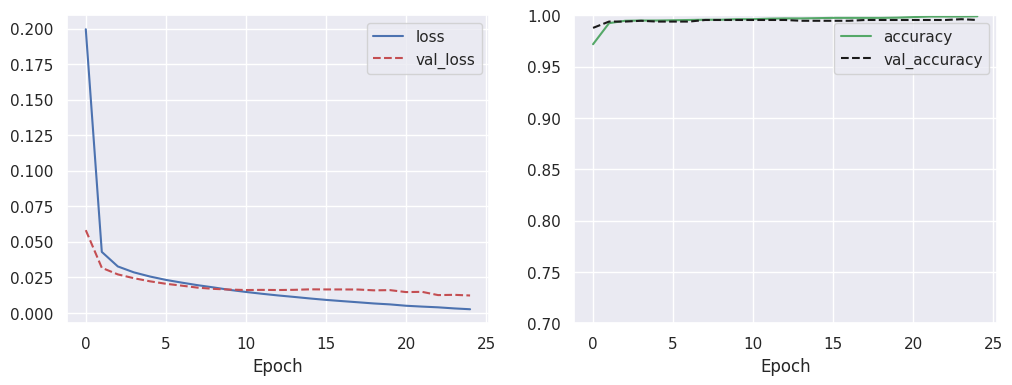

In [69]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [70]:
loss, acc = model.evaluate(X_test, y_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9969 - loss: 0.0916


In [71]:
# wine = 1, red = 0인 type_1 column 추출
y_test_c = y_test.iloc[:, 1]

# 0.9 이상인 확률은 1, 아닐 경우 0
predictions = model.predict(X_test)
y_pred = (predictions > 0.9)

# confusion matrix
from sklearn import metrics
matrix = metrics.confusion_matrix(y_pred.argmax(axis = 1), y_test_c)
matrix

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[313,   6],
       [  1, 980]])